# Echocardiogram 

In [1]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [ ]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.names

# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [4]:
names = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening',
         'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'name', 'group', 'alive-at-1']

In [5]:
data = pd.read_csv("echocardiogram.data", sep=",", names=names, on_bad_lines='warn')

In [6]:
data["patient_id"] = range(1, len(data) + 1)


Drop data which can be ignored

In [7]:
data = data.drop(["group", "mult", "name"], axis=1)


Replace "?"(missing value) with NaN and convert from object type to numeric type

In [8]:
for att in data.columns:
    data[att].replace('?', np.nan, inplace=True)
    data[att] = pd.to_numeric(data[att])


In [9]:
data.set_index("patient_id", inplace=True)


In [10]:
data.to_csv("echocardiogram_prepared.csv")


## ehrapy sanity check

In [11]:
adata = ep.io.read_csv("echocardiogram_prepared.csv",
                   index_column="patient_id")
edata = ed.EHRData.from_adata(adata=adata)


In [12]:
edata.var_names


Index(['survival', 'still-alive', 'age-at-heart-attack',
       'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd',
       'wall-motion-score', 'wall-motion-index', 'alive-at-1'],
      dtype='object')

In [13]:
ep.ad.feature_type_overview(edata)


! Features 'still-alive', 'pericardial-effusion', 'alive-at-1' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


 Detected feature types for AnnData object with 131 obs and 10 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ age-at-heart-attack
║   ╠══ epss
║   ╠══ fractional-shortening
║   ╠══ lvdd
║   ╠══ survival
║   ╠══ wall-motion-index
║   ╚══ wall-motion-score
╚══ 🗂️ Categorical features
    ╠══ alive-at-1 (2 categories)
    ╠══ pericardial-effusion (2 categories)
    ╚══ still-alive (2 categories)

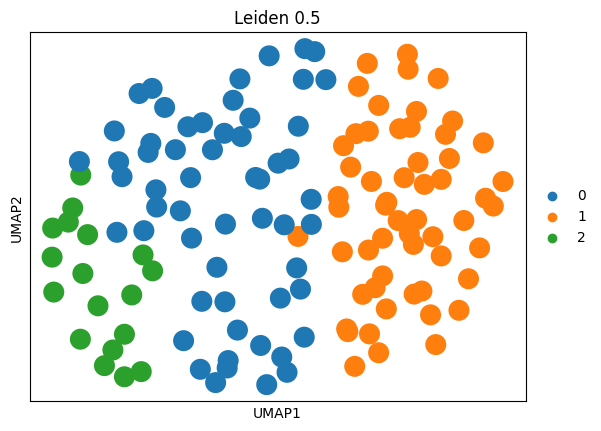

In [14]:
ep.pp.knn_impute(edata)
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")


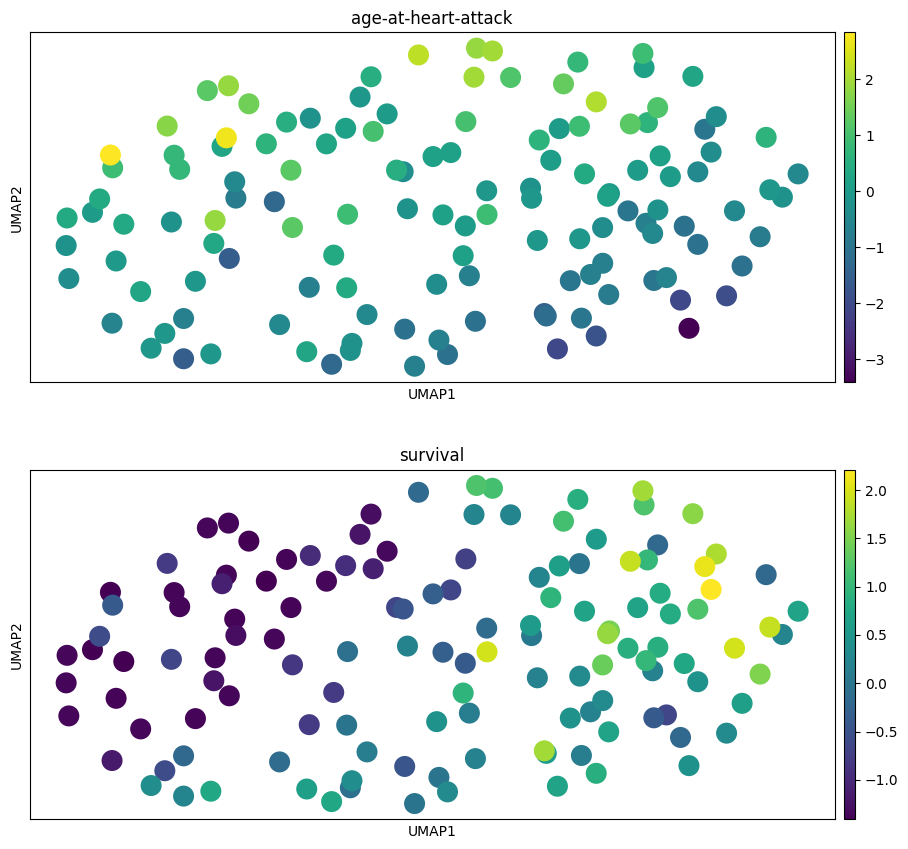

In [15]:
ep.pl.umap(edata, color=["age-at-heart-attack",
           "survival"], ncols=1, wspace=0.75)
